In [1]:
# 딥러닝 프로그램에서 주로 사용하는 자연 영상 데이터 베이스
# imageNet
# MSCoCo
# CIFAR : 크기가 작아서 MNIST 다음으로 주로 사용
# CIFAR - 10  10개부류  32*32   32*32*3 이미 텐서 구조로 되어있어서 reshape가 필요없음

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
(x_train,y_train),(x_target, y_target) =  cifar10.load_data()
x_train = x_train/255.0 ; x_target = x_target / 255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_target = tf.keras.utils.to_categorical(y_target,10)

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape  # 이미 3차원 텐서로 제공하고 있어서 reshape 안함

(50000, 32, 32, 3)

In [5]:
# 설계
cnn = Sequential()
cnn.add( Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3) ) )
cnn.add(Conv2D(32,(3,3),activation = 'relu'  ))
cnn.add(MaxPool2D(pool_size = (2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation = 'relu'))
cnn.add(Conv2D(64,(3,3),activation = 'relu'  ))
cnn.add(MaxPool2D(pool_size = (2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation='softmax'))  # 출력층

In [6]:
# 신경망 모델 학습
from tensorflow.keras.losses import categorical_crossentropy

cnn.compile(loss = categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train,y_train,batch_size=125, epochs=30,validation_data=(x_target,y_target),verbose=2)

Epoch 1/30
400/400 - 20s - loss: 1.6021 - accuracy: 0.4090 - val_loss: 1.2594 - val_accuracy: 0.5424 - 20s/epoch - 50ms/step
Epoch 2/30
400/400 - 10s - loss: 1.1959 - accuracy: 0.5765 - val_loss: 1.0352 - val_accuracy: 0.6336 - 10s/epoch - 25ms/step
Epoch 3/30
400/400 - 11s - loss: 1.0286 - accuracy: 0.6362 - val_loss: 0.9244 - val_accuracy: 0.6758 - 11s/epoch - 27ms/step
Epoch 4/30
400/400 - 10s - loss: 0.9196 - accuracy: 0.6760 - val_loss: 0.9003 - val_accuracy: 0.6840 - 10s/epoch - 25ms/step
Epoch 5/30
400/400 - 11s - loss: 0.8358 - accuracy: 0.7079 - val_loss: 0.7894 - val_accuracy: 0.7237 - 11s/epoch - 27ms/step
Epoch 6/30
400/400 - 10s - loss: 0.7606 - accuracy: 0.7349 - val_loss: 0.7642 - val_accuracy: 0.7358 - 10s/epoch - 25ms/step
Epoch 7/30
400/400 - 11s - loss: 0.7071 - accuracy: 0.7515 - val_loss: 0.7498 - val_accuracy: 0.7383 - 11s/epoch - 27ms/step
Epoch 8/30
400/400 - 10s - loss: 0.6603 - accuracy: 0.7687 - val_loss: 0.6758 - val_accuracy: 0.7651 - 10s/epoch - 25ms/step


In [7]:
res = cnn.evaluate(x_target,y_target)
res[1]*100

313/313 [==============================] - 2s 6ms/step - loss: 0.7085 - accuracy: 0.7905


79.04999852180481

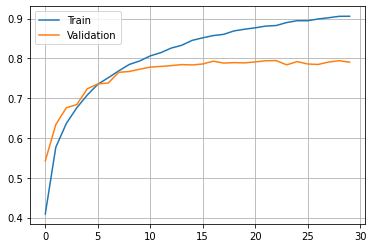

In [11]:
import matplotlib.pyplot as plt
# 정확률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

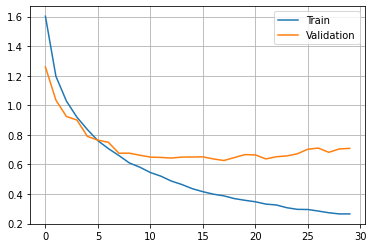

In [12]:
# 로스
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

In [13]:
cnn.save("mycnn.h5")